<a href="https://colab.research.google.com/github/ss-shrishi2000/COVID-19-Analyzer/blob/main/COVID_19_Detection_Using_X_Rays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="orange"> **COVID-19 DETECTION USING DEEP LEARNING AND CNN**

###<font color="blue"> **GENERAL INTRODUCTION**

---



*   As we know that the **COVID-19 Situation** has affected all regions of the world, there is a definite need for rapid testing and rapid evaluation of results.
*   This is not easy as the spread of the virus is exponential and the medical manpower alongwith the resources are limited.

*   So, one alternative to solve this problem is using => **Technology and Artificial Intelligence** which would not just boost the process of detection but also help to curb the curve from growing exponentially too.
*   If we observe carefully, the **X-Ray scans or CT-Scans or MRI's are basically DCM Files**.


*   Python has numerous built-in libraries that can be used to extract meaningful information from these files.







###<font color="blue"> **DRIVING REASONS FOR DEVELOPING THE MODEL**

---



###<font color="black">
1.   Blood Tests are costly **(nearly Rs 5000 per patient).**    <br>
2.   Blood Tests take time to conduct approximately **5 hours per patient** to process and bring the results.   <br>
3.   Extent Of the Spread within the body can detected easily.   <br>
4.   Classification is also possible using **Image Classification Models and Segmentation Techniques**.                                  <br>
5.   The Dataset can be easily generated and made available for instant use via some automation.                                          <br>

###<font color="blue"> **COVID +IVE SAMPLES => 142 Samples**

---


Dataset :- https://github.com/ieee8023/covid-chestxray-dataset

---



###<font color="blue"> **COVID -IVE SAMPLES => 142 Samples**

---


Dataset :- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

---



In order to train a model, we need to provide both the **Normal/Unaffected/Healthy Dataset** alongwith the **COVID-19 affected ones**. So, we combined these two datasets to come across one whole dataset.

##**PROBLEMS THAT WE FACED**


1.   It is very very difficult to distinguish between **a normal and a covide-positive patient** <br>even by a radiologist because these features are very fine, minutely-detailed <br> and needs good amount of practice and time.

2.  The task involves processing of **very Fine-Grained features extraction** to extract the <br> **meaningful data** and use the valuable information well.




#<font color="brown">**MODEL ARCHITECTURE**

Simply, using an image to produce the results isn't or working on a guess isn't appreciable in a life and death situation requiring **Medical Emergency**.


---



*   There are certain details which are specific features restricted to analyze the detection.
*   Everytime our algorithm shall be extracting how does a COVID-19 affected patient's X-Ray scan / CT-Scan looks like? 


*   Given any image, we extract the features from the image
*   **Lower Layers = Low Level Details** <br> **Higher Layers = High Level Features**
<br>
<br>

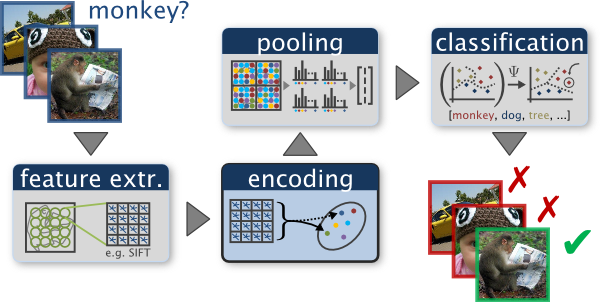







#<font color="crimson">**EFFECT OF USING FILTERS**


*   It does perform the edge detections in the image quite well and accurately.
*   We can focus on complex feature extraction very well using filters.

#<font color="crimson"> **Classification Of An Image Using A Neural Network**

The Neural Network Used Over here is the => **Binary Classifaction Problem**
binary classification tasks involve one class that is the normal state and another class that is the abnormal state.For example “not spam” is the normal state and “spam” is the abnormal state. Another example is “cancer not detected” is the normal state of a task that involves a medical test and “cancer detected” is the abnormal state.

The class for the normal state is assigned the class label 0 and the class with the abnormal state is assigned the class label 1.

<br>

#<font color="crimson">**FEATURE EXTRACTION + CLASSIFICATION = CNN**

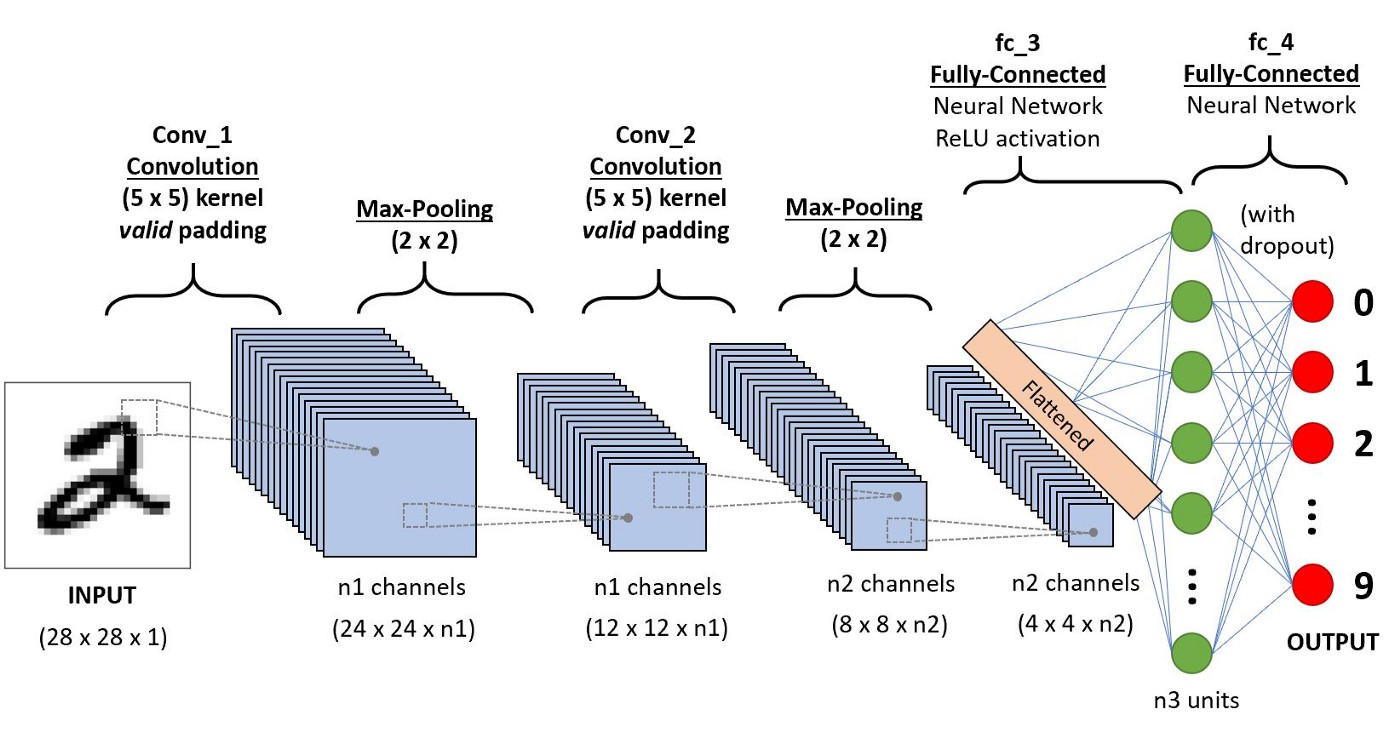



In [1]:
import pandas as pd
import os
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
FILE_PATH = "/content/drive/MyDrive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/metadata.csv"
IMAGES_PATH = "/content/drive/MyDrive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images"


In [4]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [5]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [6]:
cnt = 0
TARGET_DIR = "/content/drive/MyDrive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/Dataset/Covid"
for (i, row) in df.iterrows():
  if row["finding"]=="Pneumonia/Viral/COVID-19" and row['view']=="PA":
    filename = row['filename']
    image_path = os.path.join(IMAGES_PATH, filename)
    image_copy_path = os.path.join(TARGET_DIR, filename)
    shutil.copy2(image_path, image_copy_path)
    #print("Successful")
    cnt += 1

print(cnt)


196


In [7]:
#Some of the X-RAYS have a front view while the other ones have a back-view
#Hence, we need to discard those ones having a back-view because those aren't of any use to us.
# column-name = view


#Sampling of Images from Kaggle 
# Keeping the classes ratio to 50:50

import random
KAGGLE_FILE_PATH = "/content/drive/MyDrive/archive/chest_xray/train/NORMAL"
TARGET_NORMAL_DIR = "/content/drive/MyDrive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/Dataset/Normal_Images"


In [8]:
image_names = os.listdir(KAGGLE_FILE_PATH)

In [9]:
image_names

['IM-0525-0001-0002.jpeg',
 'IM-0528-0001.jpeg',
 'IM-0527-0001.jpeg',
 'IM-0531-0001-0001.jpeg',
 'IM-0525-0001.jpeg',
 'IM-0523-0001.jpeg',
 'IM-0523-0001-0002.jpeg',
 'IM-0530-0001.jpeg',
 'IM-0523-0001-0003.jpeg',
 'IM-0525-0001-0001.jpeg',
 'IM-0531-0001.jpeg',
 'IM-0529-0001.jpeg',
 'IM-0545-0001-0002.jpeg',
 'IM-0543-0001-0002.jpeg',
 'IM-0535-0001.jpeg',
 'IM-0539-0001-0001.jpeg',
 'IM-0534-0001.jpeg',
 'IM-0538-0001.jpeg',
 'IM-0543-0001.jpeg',
 'IM-0539-0001.jpeg',
 'IM-0533-0001-0001.jpeg',
 'IM-0540-0001.jpeg',
 'IM-0533-0001.jpeg',
 'IM-0537-0001.jpeg',
 'IM-0536-0001.jpeg',
 'IM-0541-0001.jpeg',
 'IM-0544-0001.jpeg',
 'IM-0533-0001-0002.jpeg',
 'IM-0545-0001-0001.jpeg',
 'IM-0539-0001-0002.jpeg',
 'IM-0542-0001.jpeg',
 'IM-0555-0001.jpeg',
 'IM-0551-0001.jpeg',
 'IM-0551-0001-0002.jpeg',
 'IM-0549-0001-0001.jpeg',
 'IM-0551-0001-0001.jpeg',
 'IM-0553-0001.jpeg',
 'IM-0546-0001.jpeg',
 'IM-0553-0001-0001.jpeg',
 'IM-0553-0001-0003.jpeg',
 'IM-0553-0001-0002.jpeg',
 'IM-055

In [10]:
random.shuffle(image_names)

In [11]:
for i in range(196):
  image_name = image_names[i]
  # we have randomly shuffled 196 images
  image_path = os.path.join(KAGGLE_FILE_PATH, image_name)
  target_path = os.path.join(TARGET_NORMAL_DIR, image_name)
  shutil.copy2(image_path, target_path)
  print("Copying")

Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying
Copying


In [12]:
!wget http://cb.lk/covid_19

--2022-05-23 17:40:04--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-05-23 17:40:04--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-05-23 17:40:05--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022

In [13]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [26]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [24]:
#CNN BASED MODEL IN KERAS
#In keras, we have multiple layers wherein every layer posses some number of filters
#A Layered Architecture that we shall be implementing
#Why is this helpful?
#The layers are arranged in such a way so that they detect simpler patterns first (lines, curves, etc.) 
#and more complex patterns (faces, objects, etc.) further along. By using a CNN, one can enable sight to computers.

model = Sequential()

#Firstly we are gonna implement 32 number of filters
#We are keeping lesser number of filters intially because initially we intend to detect the lower layer features 

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))

#32 different type of feature extractors  => 2D-convolution
# We have used standard (3*3) kernels because it is a standard notation to use them

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# High-level features are built on top of low-level features to detect objects and larger shapes in the image. 
#Convolutional neural networks use both types of features: the first couple convolutional layers will learn filters for finding lines, dots, curves etc.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#added 4 convolution layers
# as we go deeper into the model, we need to increase the number of channels.

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])


#<font color="crimson">**1. CONVOLUTION**

####Convolution is a mathematical operation that allows the merging of two sets of information. 
* In the case of CNN, convolution is applied to the input data to filter the information and produce a feature map.
* This filter is also called a **kernel, or feature detector**, and its dimensions can be, for example, 3x3. 
* To perform convolution, **the kernel goes over the input image, doing matrix multiplication element after element**.
* The result for each **receptive field (the area where convolution takes place)** is written down in the feature map.
* We continue sliding the filter until the feature map is complete.
* The feature hence extracted is then highlighted the most using the pixel density or the colour of the cell corresponding to the feature extracted.

<br>

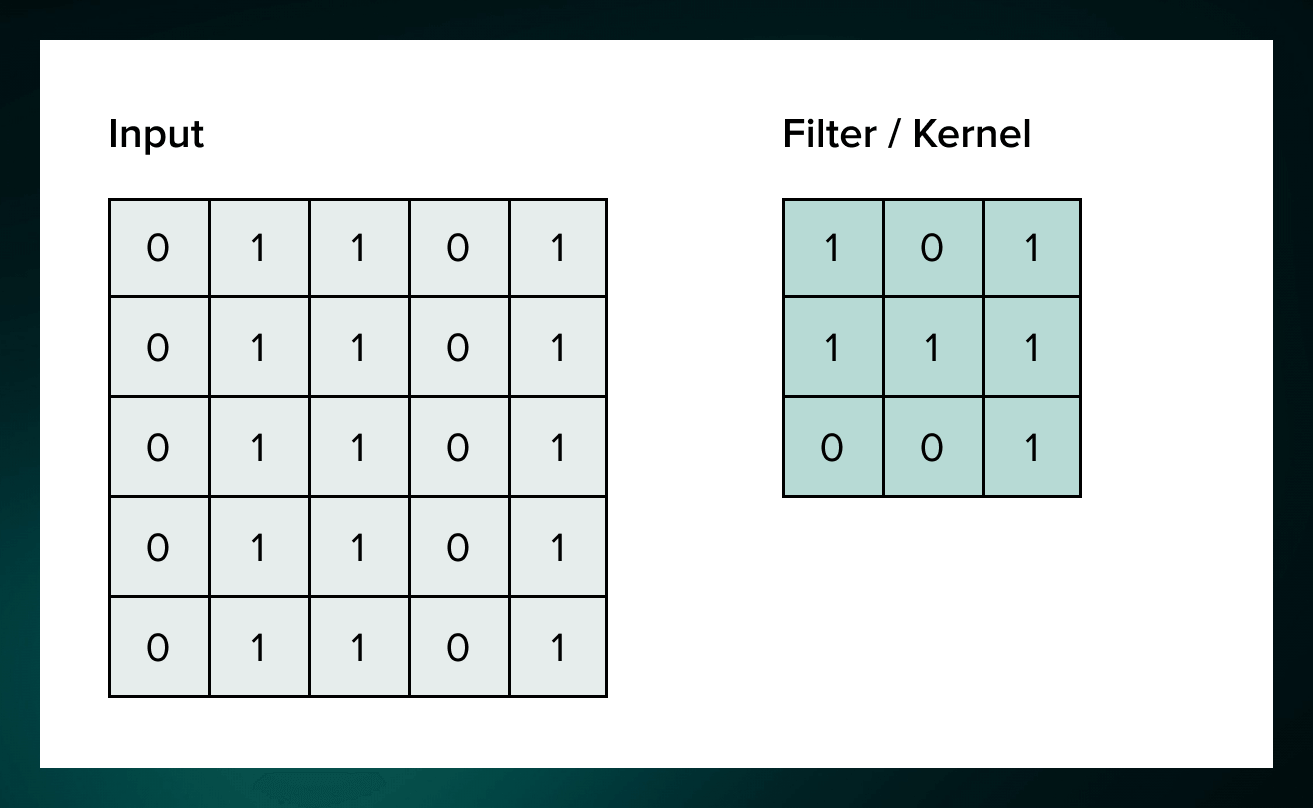

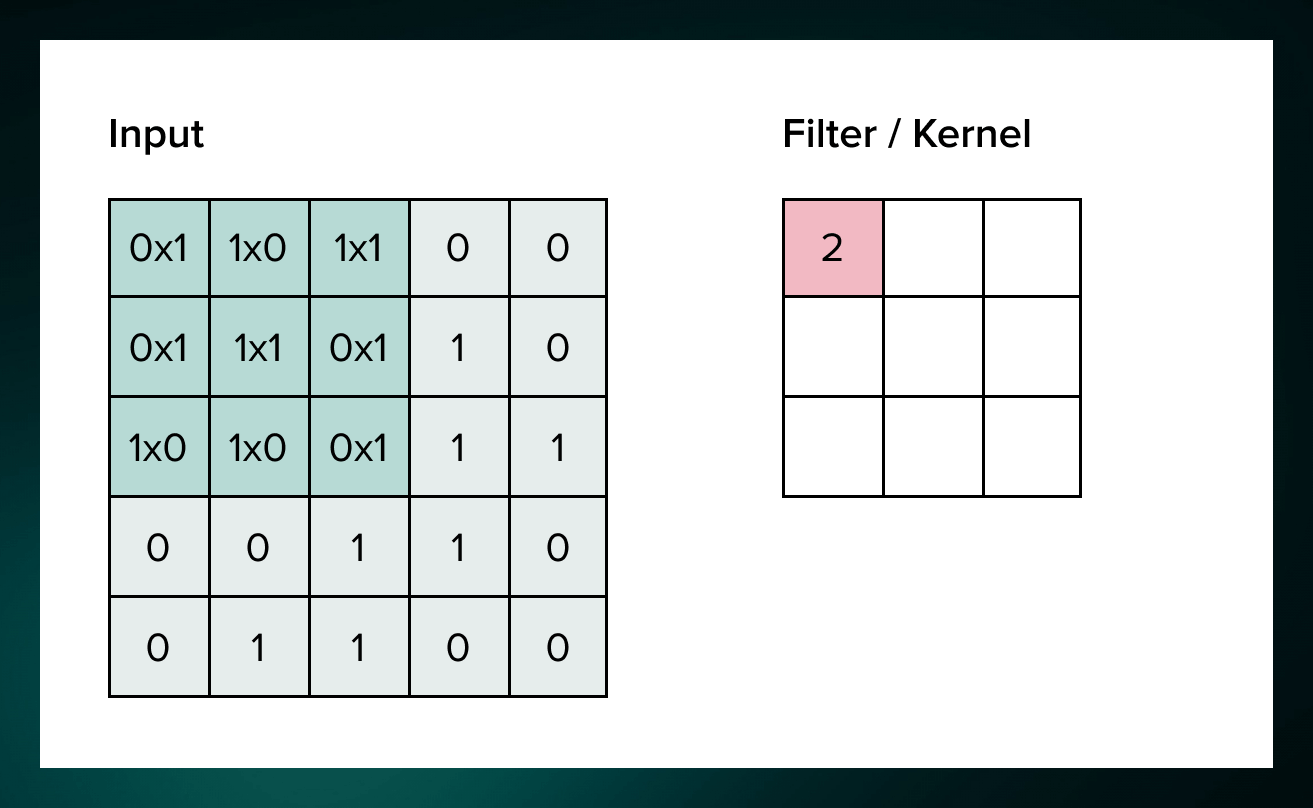



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

#<font color="blue">**TRAINING OUR MODEL**


In [18]:
#training the model using the keras image data generator

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [19]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
    )



Found 224 images belonging to 2 classes.


In [20]:
train_generator.class_indices

#The label for Covid Category is 0 and for Normal category, it is 1

{'Covid': 0, 'Normal': 1}

In [21]:
validation_generator = test_dataset.flow_from_directory(
     'CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [22]:
# Label 0 for Covid Positive Cases and Label 1 for Covid Negative Cases

hist = model.fit_generator(train_generator, steps_per_epoch=6, epochs=80, validation_data = validation_generator, validation_steps = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/80
6/6 [==============================] - 46s 7s/step - loss: 0.9779 - accuracy: 0.5625 - val_loss: 0.6421 - val_accuracy: 0.6333
Epoch 2/80
6/6 [==============================] - 43s 7s/step - loss: 0.5113 - accuracy: 0.7760 - val_loss: 0.4123 - val_accuracy: 0.9333
Epoch 3/80
6/6 [==============================] - 43s 7s/step - loss: 0.4166 - accuracy: 0.7969 - val_loss: 0.3928 - val_accuracy: 0.9167
Epoch 4/80
6/6 [==============================] - 43s 7s/step - loss: 0.2684 - accuracy: 0.8698 - val_loss: 0.1943 - val_accuracy: 0.9500
Epoch 5/80
6/6 [==============================] - 43s 7s/step - loss: 0.2741 - accuracy: 0.8854 - val_loss: 0.2215 - val_accuracy: 0.9667
Epoch 6/80
6/6 [==============================] - 43s 7s/step - loss: 0.2212 - accuracy: 0.9219 - val_loss: 0.1545 - val_accuracy: 0.9667
Epoch 7/80
6/6 [==============================] - 43s 7s/step - loss: 0.1910 - accuracy: 0.9271 - val_loss: 0.1496 - val_accuracy: 0.9833
Epoch 8/80
6/6 [==================

#**Loss Percentage is gradually decreasing as we can see from the Epoch steps.**

In [23]:
model.save("model_adv.h5")

#A very very crucial step in our project to take it further for constructing a web app.
